## OR-tools example

In [2]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


In [3]:
import logging
import sys
logger_MILP = logging.getLogger('optiwindnet.MILP')
stdoutHandler = logging.StreamHandler(stream=sys.stdout)
logger_MILP.addHandler(stdoutHandler)
logger_MILP.setLevel(logging.INFO)

### Initialize Moray East

In [3]:
file_path =  '../../optiwindnet/data/Moray East.yaml'
wfn = WindFarmNetwork.from_yaml(filepath=file_path, cables=7)

<Axes: >

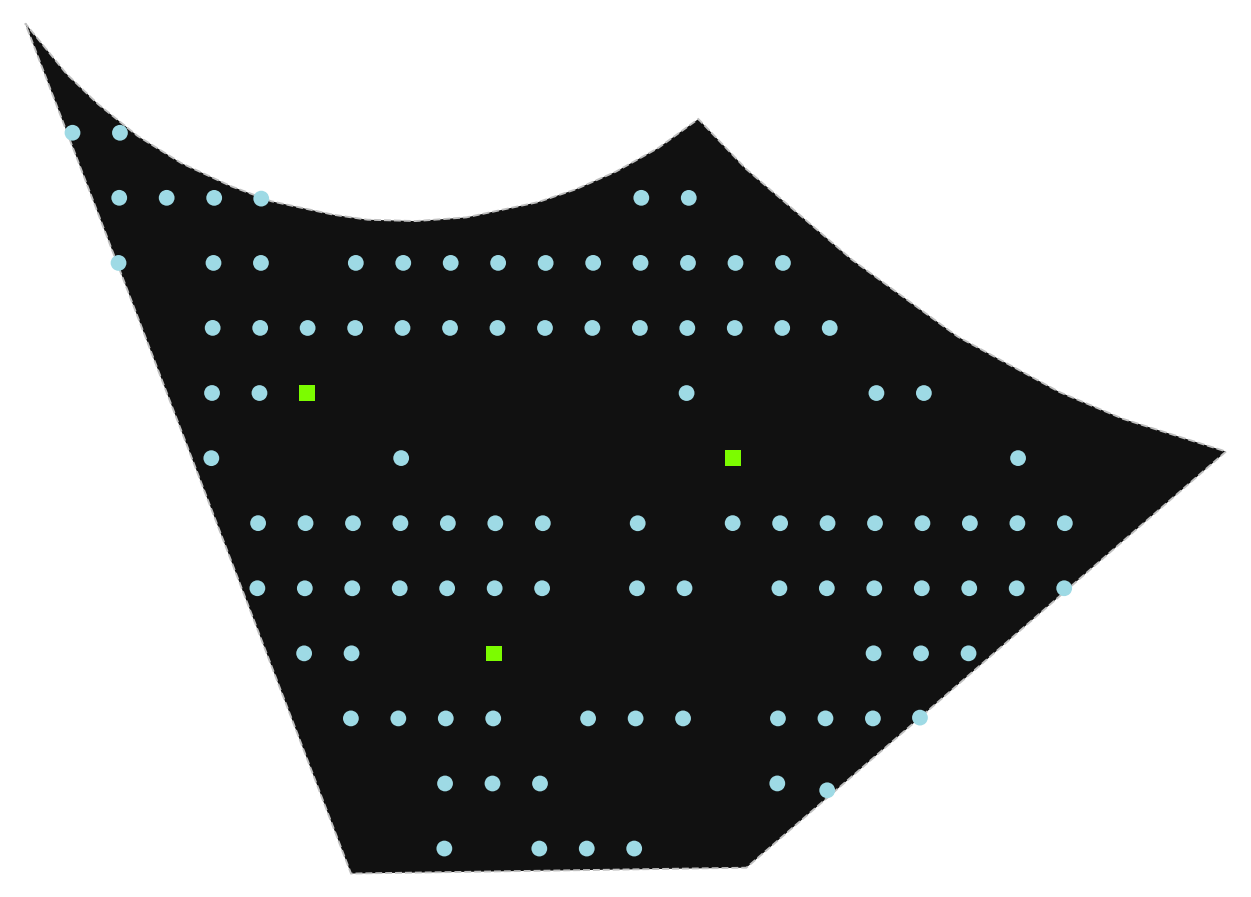

In [4]:
wfn.plot_location()

<Axes: >

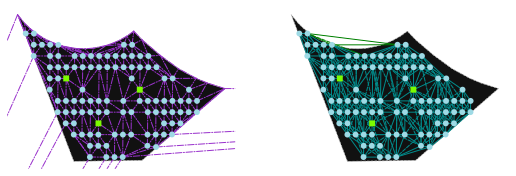

In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='none', figsize=(9, 3))
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)

### Optimize Moray East

Initial heuristic solution to warm-start the solver:

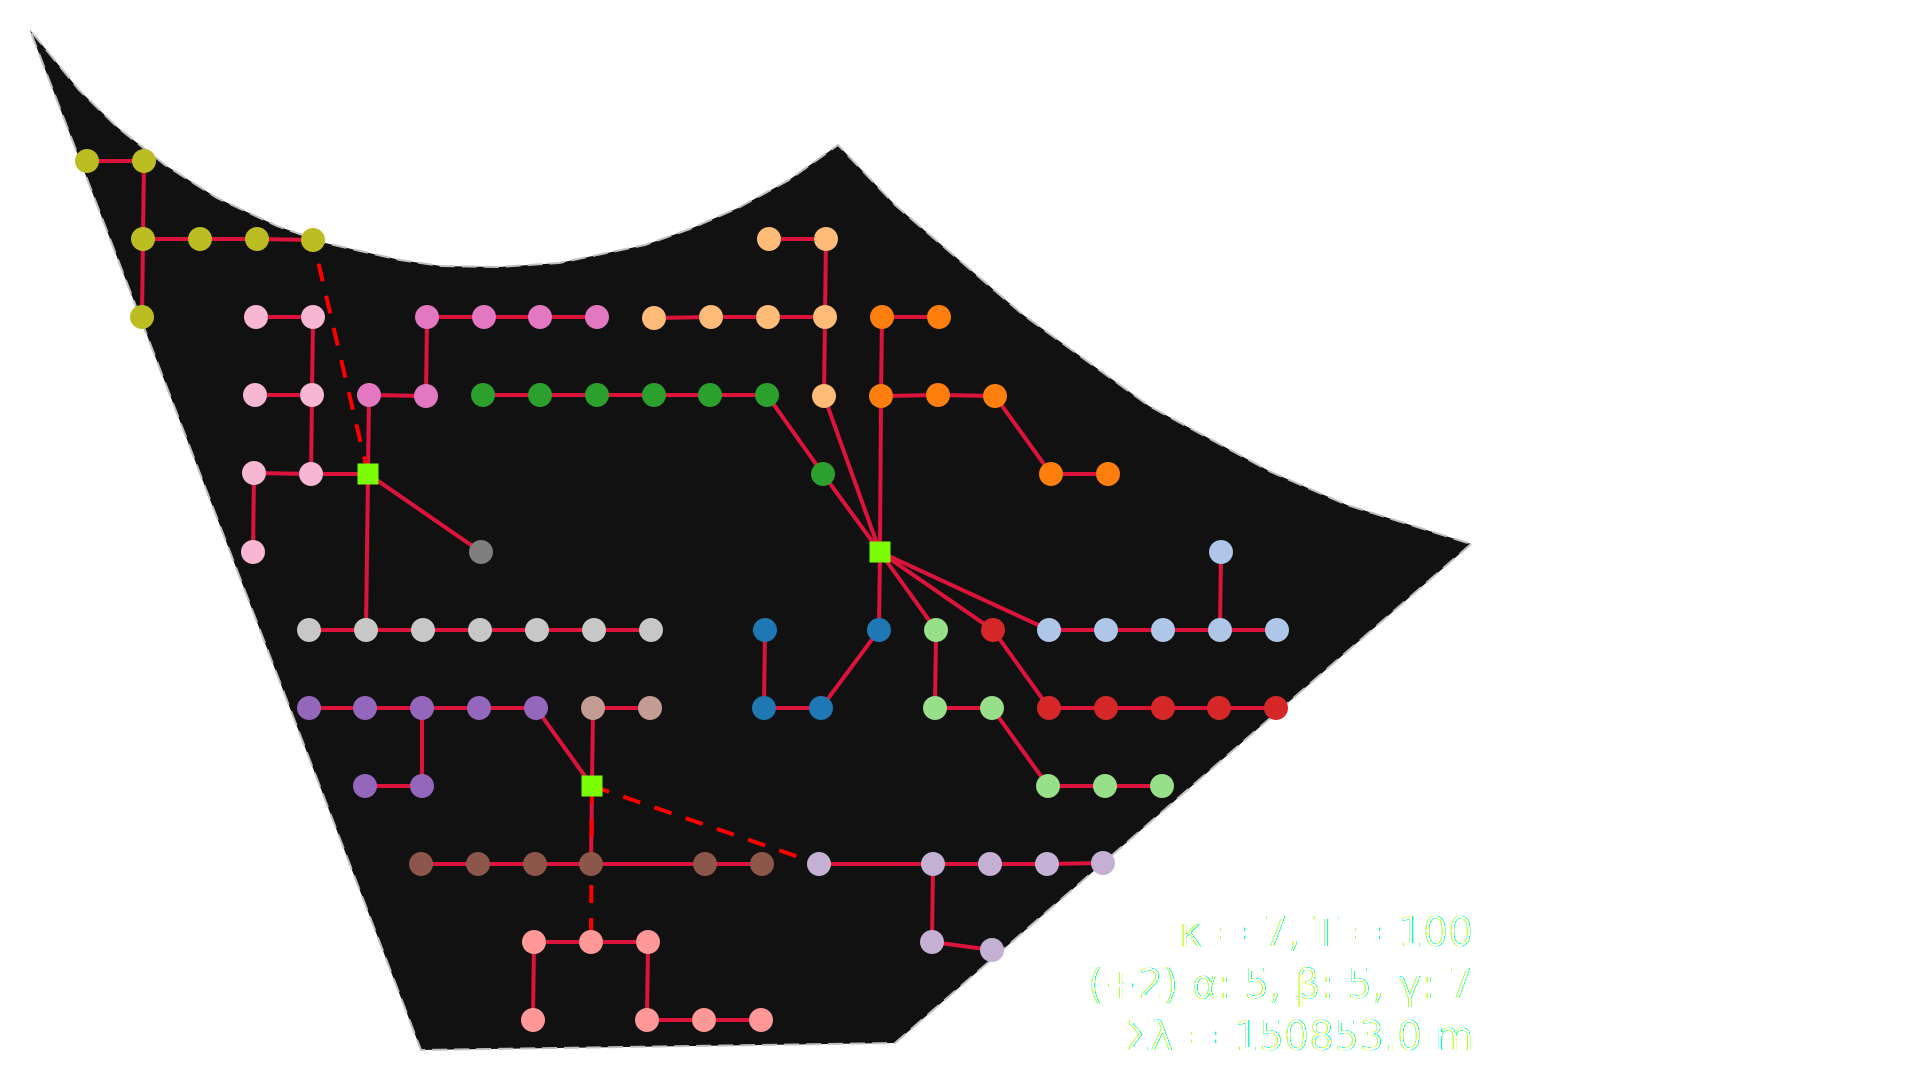

In [8]:
Sʹ = EW_presolver(A, capacity=capacity)
Gʹ = G_from_S(Sʹ, A)
svgplot(Gʹ)

## CPLEX

In [9]:
solver = solver_factory('cplex')

In [10]:
solver.set_problem(
    P, A, capacity, warmstart=Sʹ,
    gateXings_constraint=False,
    branching=True,
    gates_limit=False,
)

In [11]:
solver.solve(timelimit=5, mipgap=0.01)

objective: 143303.812473, bound: 141873.359886, gap: 0.0100, termination: optimal


(143303.81247279348, 141873.35988639478, 0.009981957644499273, 'optimal')

In [12]:
G = solver.get_solution()

Solution pool has 26 solutions.
#0 -> incumbent (objective: 143303.812, length: 143303.812)
#1 halted pool search: objective (143304.253) > incumbent's length


In [13]:
solver.soln

24

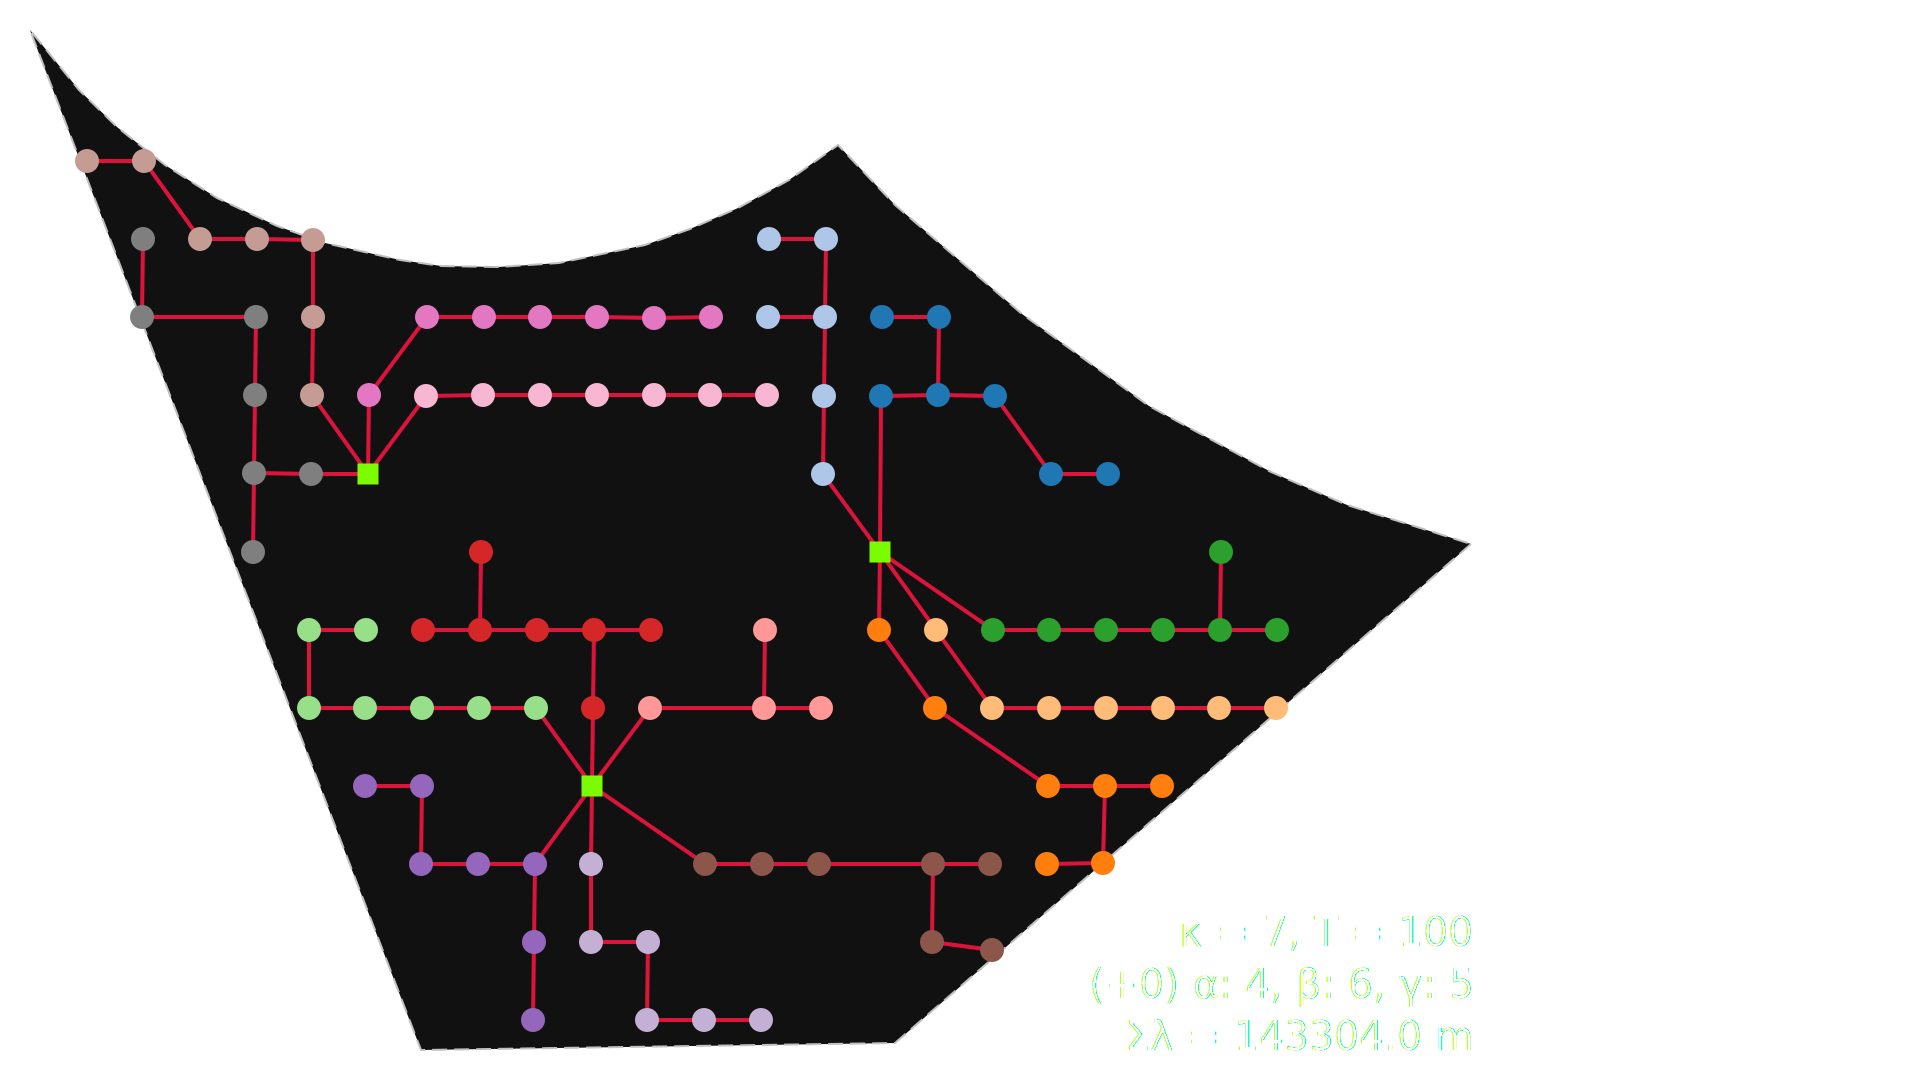

In [14]:
svgplot(G)

In [16]:
G.graph['pool_entry']

KeyError: 'pool_entry'

In [ ]:
solver.sorted_index_

## ORTools

In [9]:
solver = solver_factory('ortools')

load C:\Users\s213184\programs\miniconda\envs\work312\Lib\site-packages\ortools\.libs\zlib1.dll...
load C:\Users\s213184\programs\miniconda\envs\work312\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load C:\Users\s213184\programs\miniconda\envs\work312\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load C:\Users\s213184\programs\miniconda\envs\work312\Lib\site-packages\ortools\.libs\re2.dll...
load C:\Users\s213184\programs\miniconda\envs\work312\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load C:\Users\s213184\programs\miniconda\envs\work312\Lib\site-packages\ortools\.libs\highs.dll...
load C:\Users\s213184\programs\miniconda\envs\work312\Lib\site-packages\ortools\.libs\ortools.dll...


In [10]:
solver.set_problem(
    P, A, capacity, warmstart=Sʹ,
    gateXings_constraint=False,
    branching=True,
    gates_limit=False,
)

In [15]:
solver.solve(timelimit=60, mipgap=0.01, verbose=True)


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 60 log_search_progress: true relative_gap_limit: 0.01
Setting number of workers to 16

Initial optimization model 'Moray East': (model_fingerprint: 0x5d39f93dff015e4f)
#Variables: 2'428 (#bools: 1'214 in floating point objective)
  - 1'214 Booleans in [0,1]
  - 914 in [0,6]
  - 300 in [0,7]
#kAtMostOne: 780 (#literals: 2'330)
#kLinear1: 2'428 (#enforced: 2'428)
#kLinearN: 303 (#terms: 6'070)

Starting presolve at 0.00s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 1214 terms with magnitude in [1119.02, 18596.1] average = 3961.18
[Scaling] Objective coefficient relative error: 2.09617e-10
[Scaling] Objective worst-case absolute error: 7.83325e-05
[Scaling] Objective scaling factor: 2.09715e+06
  7.82e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.34e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  3.21e-0

4

In [16]:
G = solver.get_solution()

Solution pool has 34 solutions.
#0 -> incumbent (objective: 143300.106, length: 143300.106)
#1 halted pool search: objective (144284.499) > incumbent's length


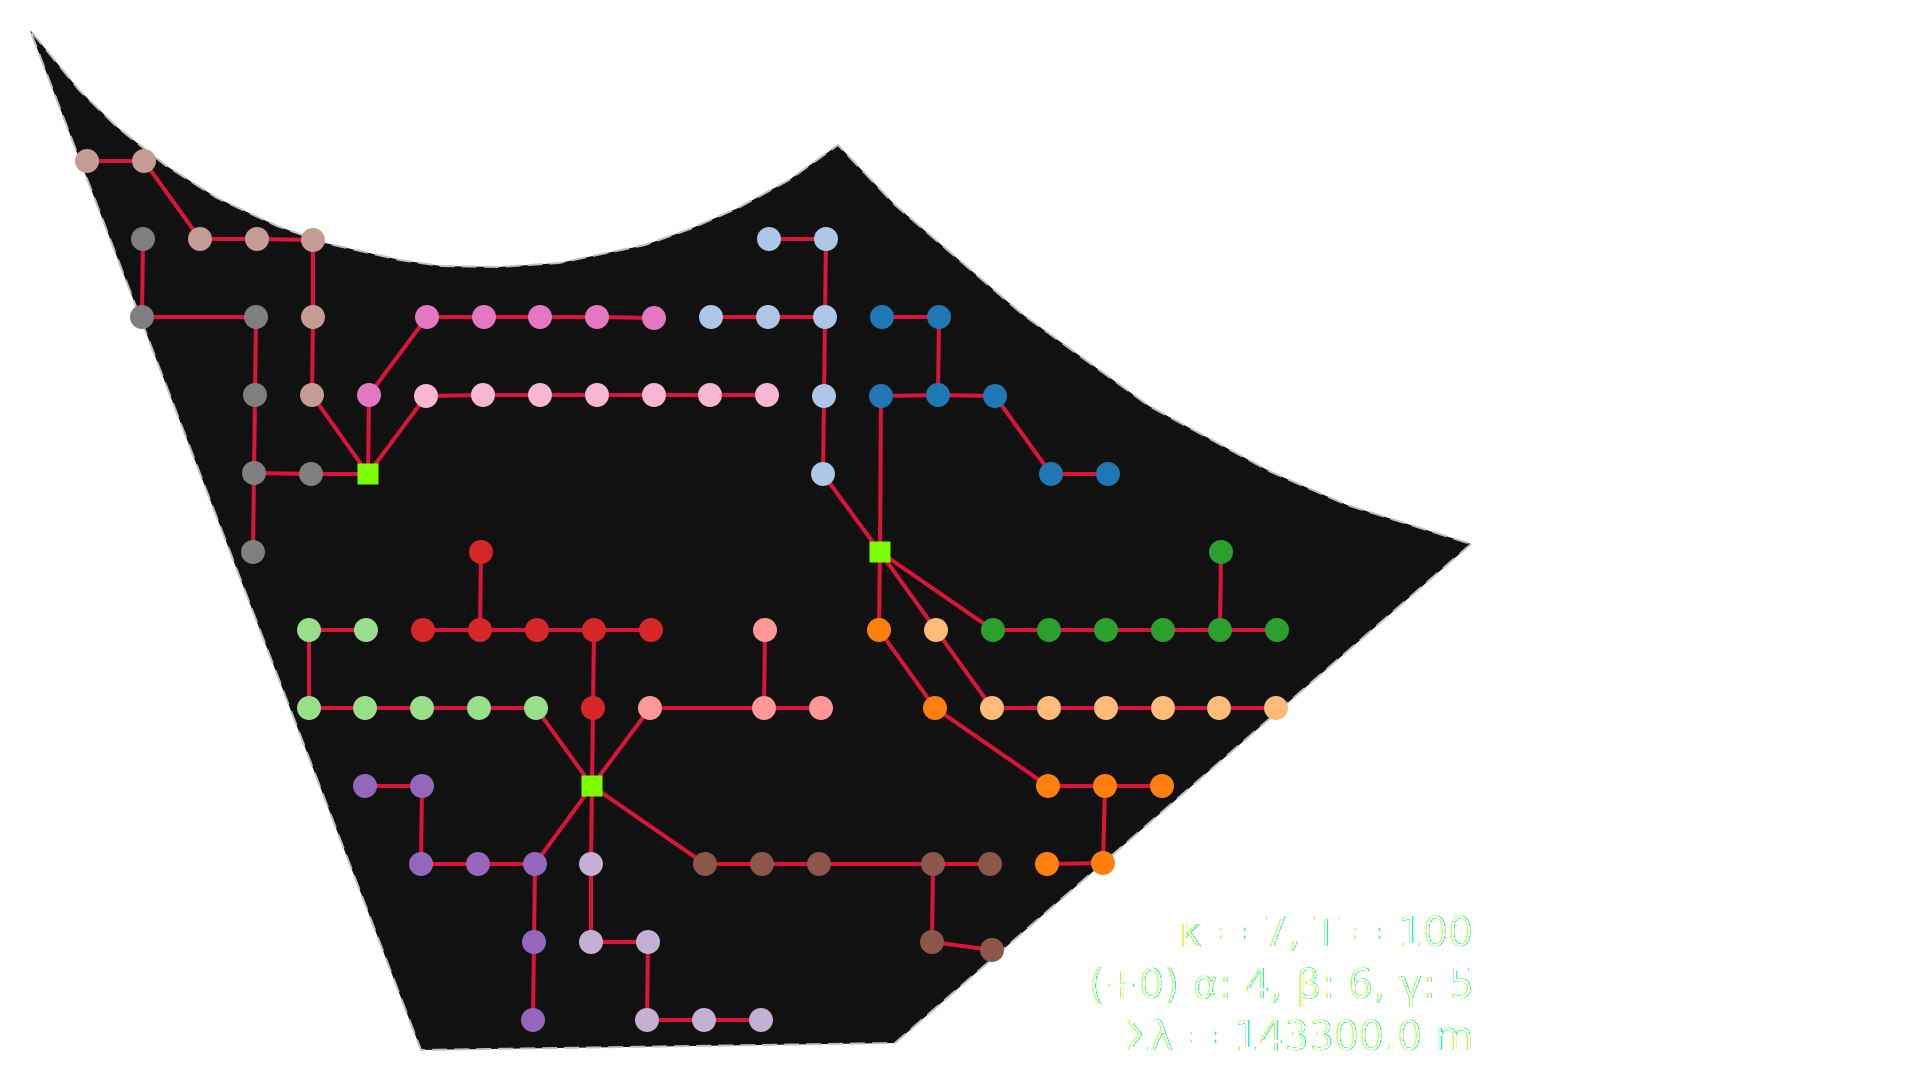

In [18]:
svgplot(G)

In [16]:
G.graph['pool_entry']

KeyError: 'pool_entry'

In [ ]:
solver.sorted_index_

## Gurobi

In [9]:
solver = solver_factory('gurobi')

In [10]:
solver.set_problem(
    P, A, capacity, warmstart=Sʹ,
    gateXings_constraint=False,
    branching=True,
    gates_limit=False,
)

In [11]:
solver.solve(timelimit=5, mipgap=0.01)

objective: 143408.367091, bound: 141975.482767, gap: 0.0100, termination: optimal


(143408.36709080794, 141975.48276651348, 0.00999163684352622, 'optimal')

In [12]:
G = solver.get_solution()

Solution pool has 10 solutions.
#0 -> incumbent (objective: 143408.367, length: 146531.915)
#1 discarded (objective: 143409.684, length: 146531.915)
#2 -> incumbent (objective: 143840.069, length: 143840.069)
#3 halted pool search: objective (143840.608) > incumbent's length


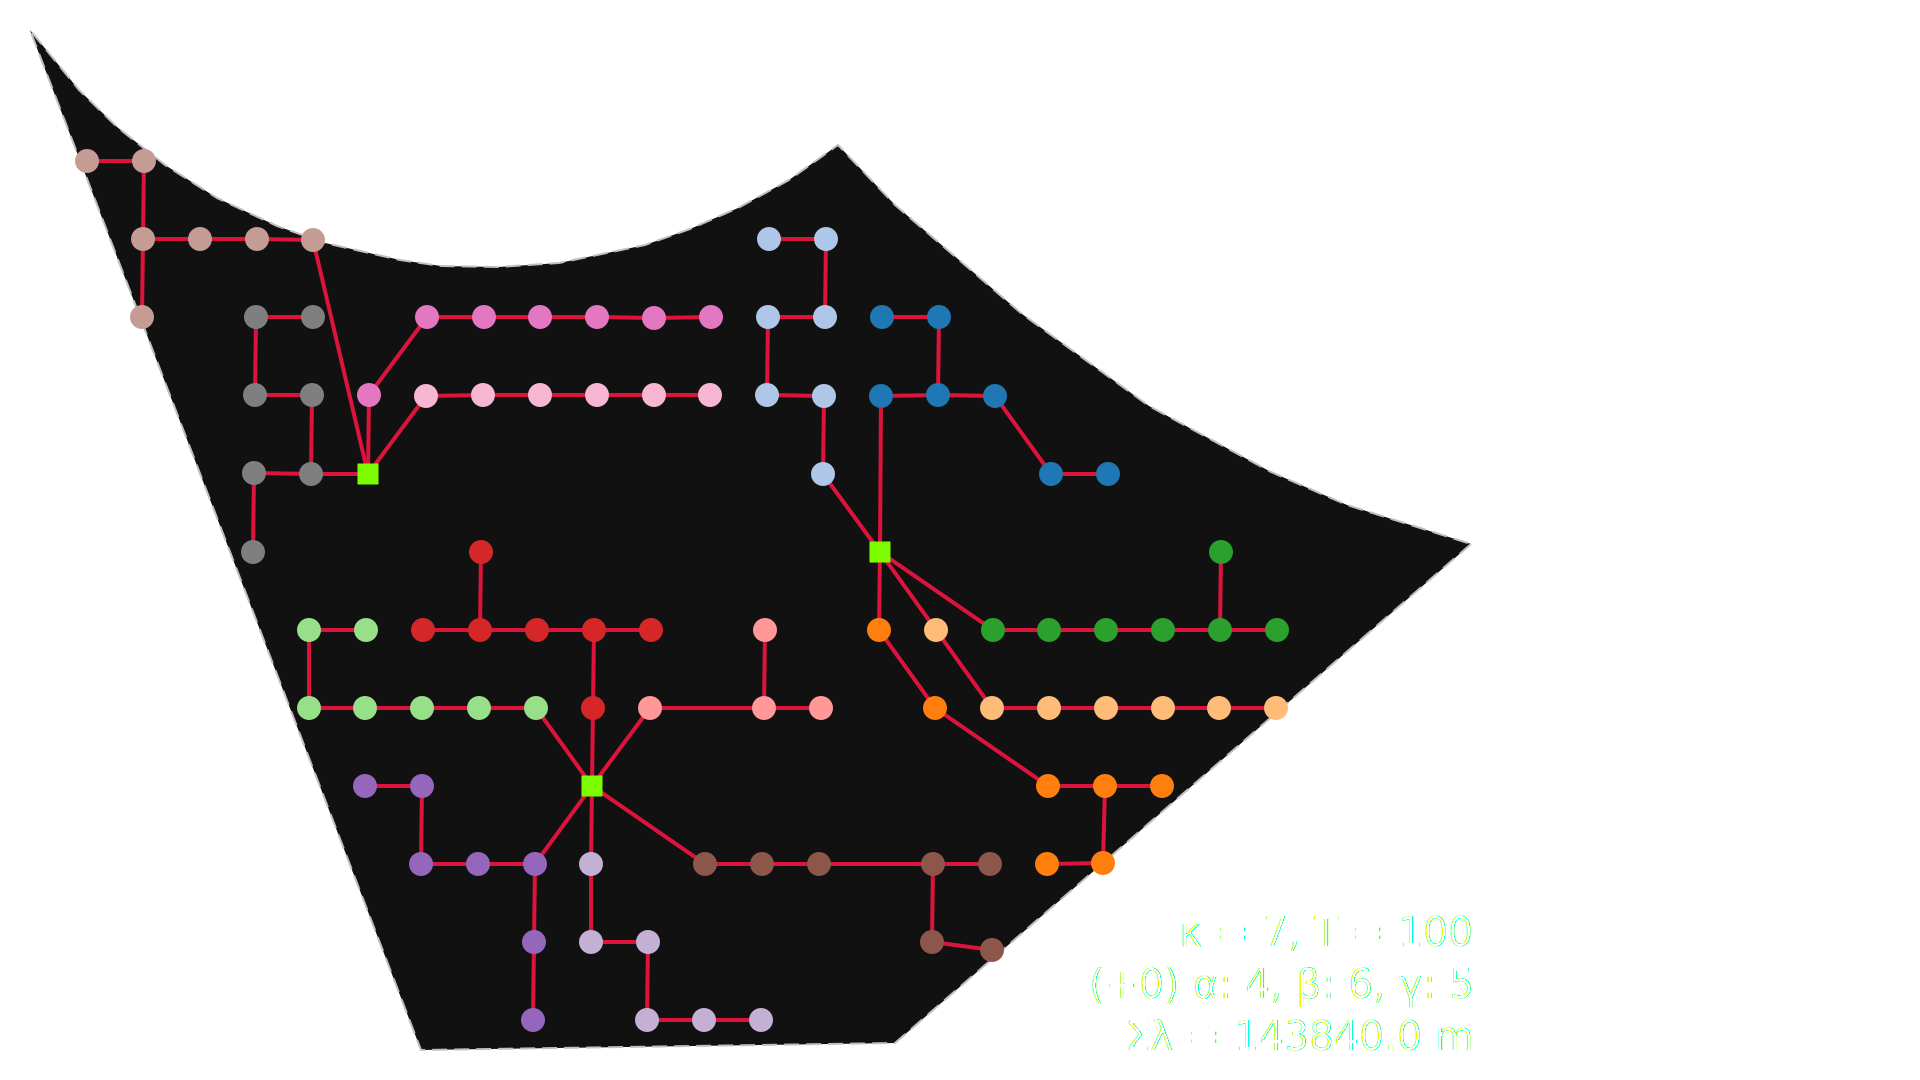

In [13]:
svgplot(G)

## CBC

In [9]:
solver = solver_factory('cbc')

In [10]:
solver.set_problem(
    P, A, capacity, warmstart=Sʹ,
    gateXings_constraint=False,
    branching=True,
    gates_limit=False,
)

In [11]:
solver.solve(timelimit=60, mipgap=0.01, verbose=True)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - C:\Users\s213184\programs\cbc_julia_mingw32_2.10.8\bin\cbc.exe -threads 16 -timeMode elapsed -nodeStrategy downFewest -Dins on -VndVariableNeighborhoodSearch on -Rens on -Rins on -pivotAndComplement off -proximitySearch off -gomoryCuts on -mixedIntegerRoundingCuts on -flowCoverCuts on -cliqueCuts off -twoMirCuts off -knapsackCuts off -probingCuts off -zeroHalfCuts off -liftAndProjectCuts off -residualCapacityCuts off -seconds 60 -ratioGap 0.01 -printingOptions all -import C:\Users\s213184\tmp\tmpksj2o33x.pyomo.lp -mipstart \Users\s213184\tmp\tmpm0y7wnuz.cbc.soln -stat=1 -solve -solu C:\Users\s213184\tmp\tmpksj2o33x.pyomo.soln (default strategy 1)
threads was changed from 0 to 16
Option for timeMode changed from cpu to elapsed
Option for nodeStrategy changed from fewest to downfewest
Option for Dins changed from off to on
Option for VndVariableNeighborhoodSearch changed from off to on
Option for Re

(144616.298137, 141536.95, 0.02129323026981944, 'maxTimeLimit')

In [12]:
G = solver.get_solution()

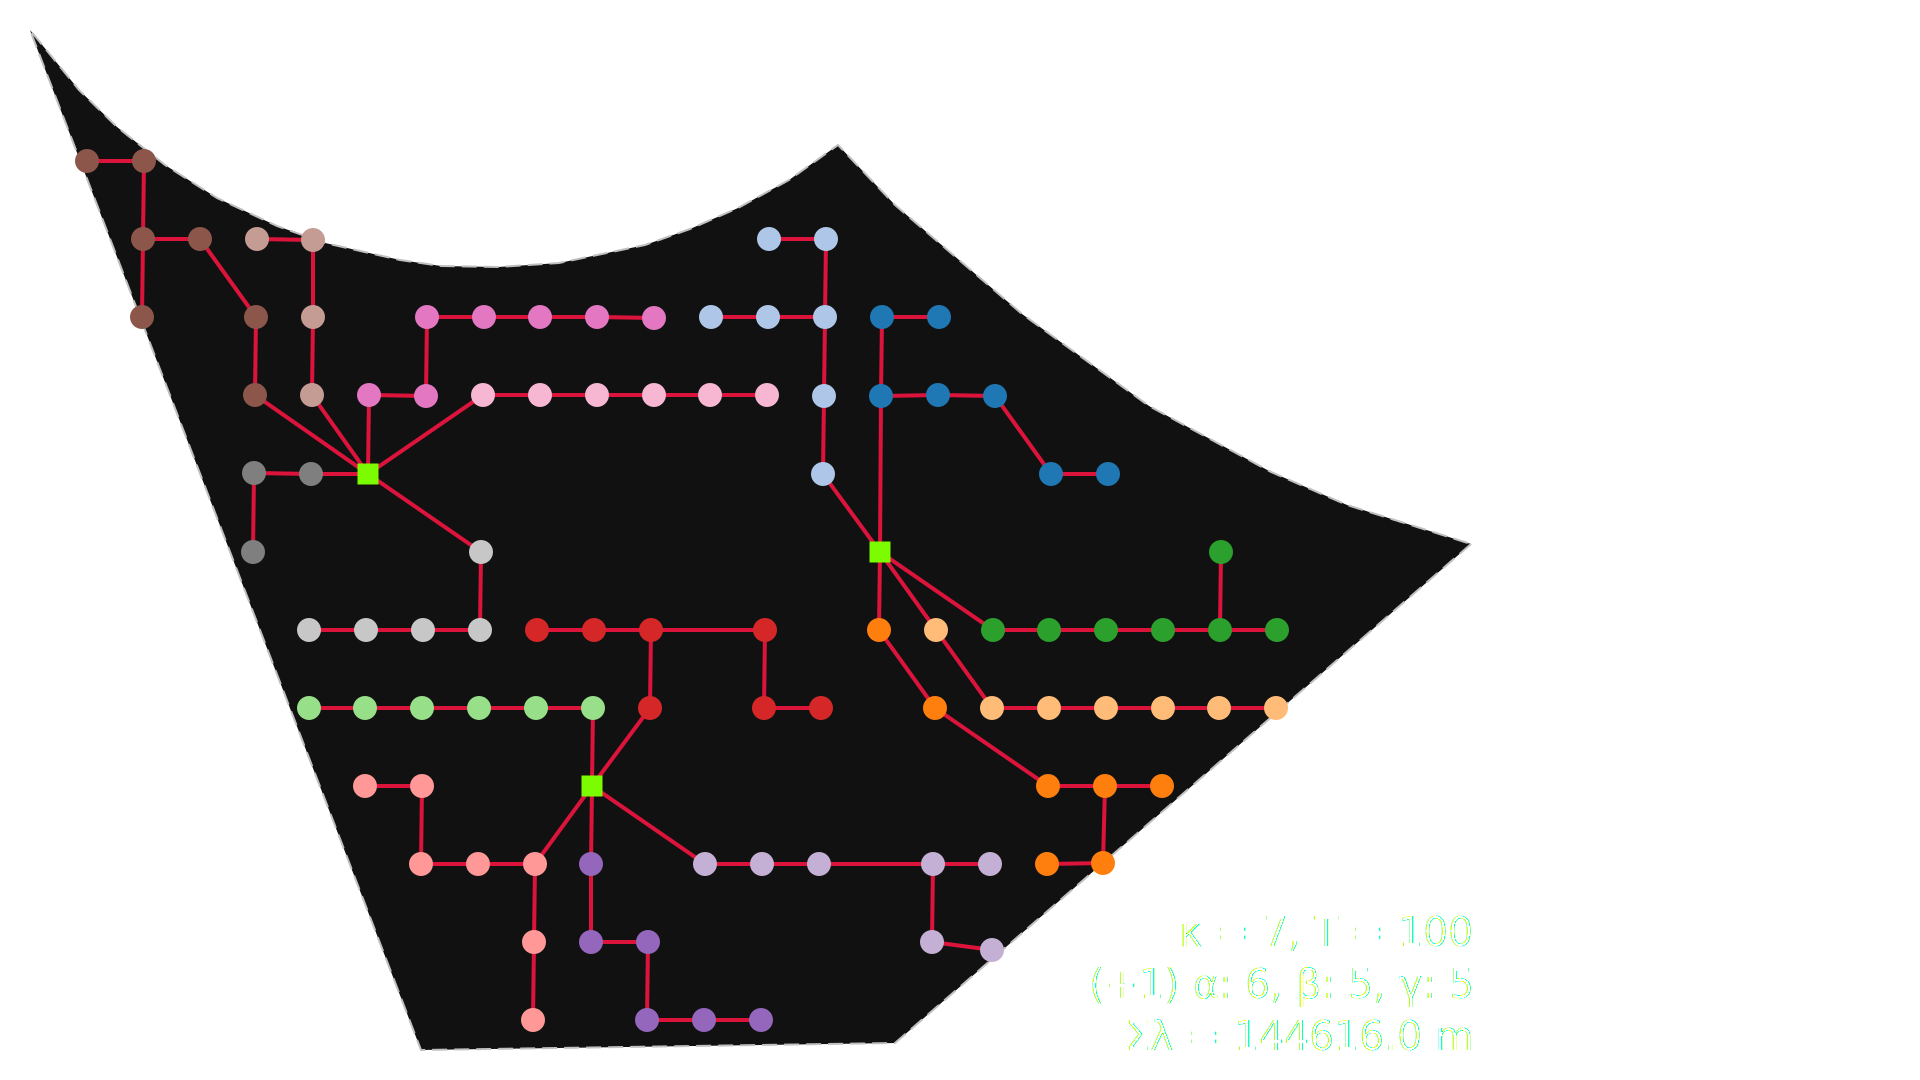

In [13]:
svgplot(G)

## HiGHS

In [14]:
solver = solver_factory('highs')

In [15]:
solver.set_problem(
    P, A, capacity, warmstart=Sʹ,
    gateXings_constraint=False,
    branching=True,
    gates_limit=False,
)

In [16]:
solver.solve(timelimit=60, mipgap=0.01, verbose=True)

Running HiGHS 1.10.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
RUN!
MIP  has 3511 rows; 2428 cols; 13256 nonzeros; 2428 integer variables (1214 binary)
Coefficient ranges:
  Matrix [1e+00, 7e+00]
  Cost   [1e+03, 2e+04]
  Bound  [1e+00, 7e+00]
  RHS    [1e+00, 1e+02]
Assessing feasibility of MIP using primal feasibility and integrality tolerance of       1e-06
Solution has               num          max          sum
Col     infeasibilities      0            0            0
Integer infeasibilities      0            0            0
Row     infeasibilities      0            0            0
Row     residuals            0            0            0
Presolving model
3511 rows, 2428 cols, 13256 nonzeros  0s
3165 rows, 2424 cols, 11445 nonzeros  0s

MIP start solution is feasible, objective value is 150853.103342

Solving MIP model with:
   3165 rows
   2424 cols (1210 binary, 1214 integer, 0 implied int., 0 continuous)
   11445 nonzeros

Src: B => Branching; C => Central r

(143973.83712234336, 141993.53504697292, 0.013754596772243222, 'maxTimeLimit')

In [17]:
G = solver.get_solution()

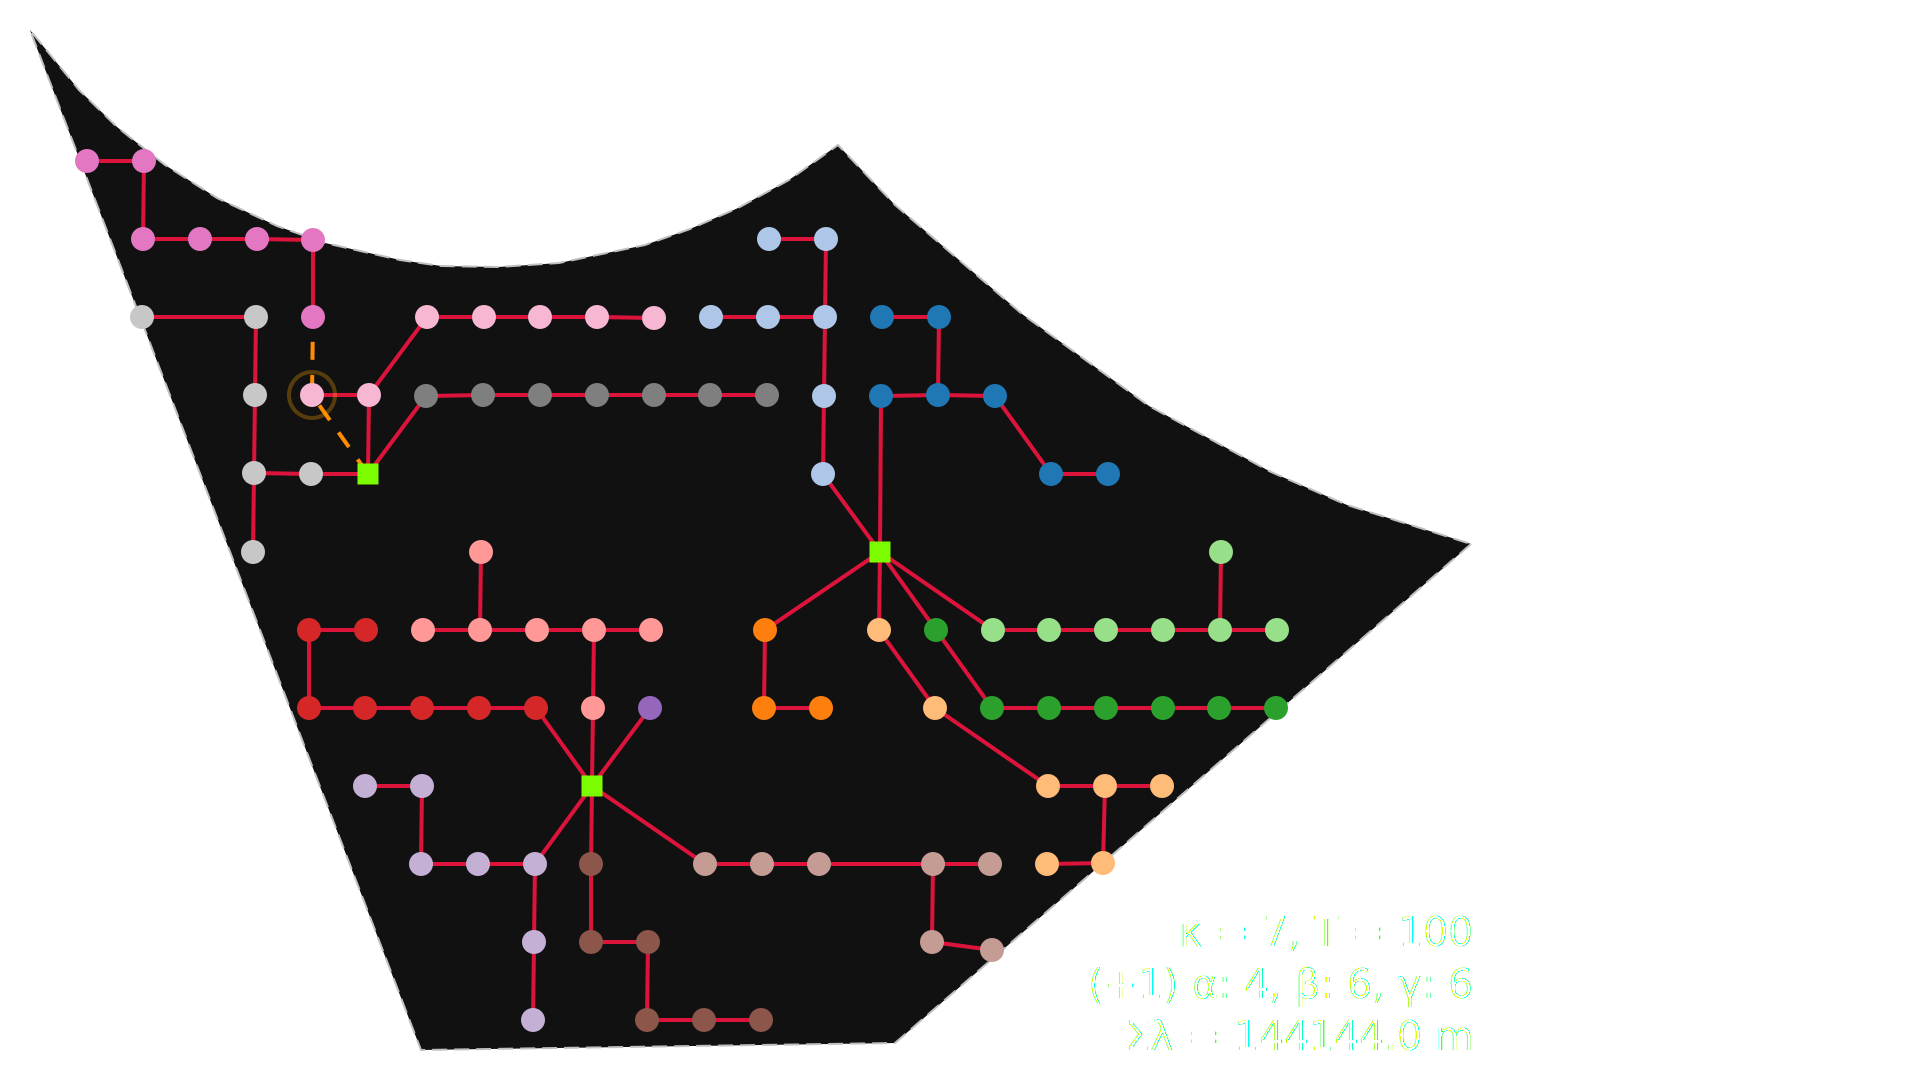

In [18]:
svgplot(G)

In [17]:
model = ort.make_min_length_model(
    A, capacity,
    gateXings_constraint=False,
    branching=True,
    gates_limit=False
)
ort.warmup_model(model, Sʹ);

NameError: name 'ort' is not defined

In [9]:
orter.parameters.max_time_in_seconds = 40
orter.parameters.relative_gap_limit = 0.005
orter.parameters.num_workers = 8

# be verbose
orter.parameters.log_search_progress = True
# required to get the log inside the notebook (goes only to console otherwise)
orter.log_callback = print

result = orter.solve(model)

gap = 1 - orter.BestObjectiveBound()/orter.ObjectiveValue()
print('=================================================================',
      #orter.ResponseStats(),  # uncomment if orter.parameters.log_search_progress == False
      f"\nbest solution's strategy: {orter.SolutionInfo()}",
      f'\ngap: {100*gap:.1f}%')


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model 'Moray East': (model_fingerprint: 0x5d39f93dff015e4f)
#Variables: 2'428 (#bools: 1'214 in floating point objective)
  - 1'214 Booleans in [0,1]
  - 914 in [0,6]
  - 300 in [0,7]
#kAtMostOne: 780 (#literals: 2'330)
#kLinear1: 2'428 (#enforced: 2'428)
#kLinearN: 303 (#terms: 6'070)

Starting presolve at 0.00s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 1214 terms with magnitude in [1119.02, 18596.1] average = 3961.18
[Scaling] Objective coefficient relative error: 2.09617e-10
[Scaling] Objective worst-case absolute error: 7.83325e-05
[Scaling] Objective scaling factor: 2.09715e+06
  7.57e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.52e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  1.49e-04s  0.00e+00d  [

In [9]:
orter.parameters.max_time_in_seconds = 40
orter.parameters.relative_gap_limit = 0.005
orter.parameters.num_workers = 8

# be verbose
orter.parameters.log_search_progress = True
# required to get the log inside the notebook (goes only to console otherwise)
orter.log_callback = print

result = orter.solve(model)

gap = 1 - orter.BestObjectiveBound()/orter.ObjectiveValue()
print('=================================================================',
      #orter.ResponseStats(),  # uncomment if orter.parameters.log_search_progress == False
      f"\nbest solution's strategy: {orter.SolutionInfo()}",
      f'\ngap: {100*gap:.1f}%')


Starting CP-SAT solver v9.11.4210
Parameters: max_time_in_seconds: 40 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model 'Moray East': (model_fingerprint: 0x7b9ac3fa114f13b7)
#Variables: 2'428 (#bools: 757 in floating point objective)
  - 1'671 Booleans in [0,1]
  - 457 in [-6,6]
  - 300 in [0,7]
#kAtMostOne: 423 (#literals: 1'922)
#kLinear1: 3'342 (#enforced: 3'342)
#kLinearN: 103 (#terms: 2'571)

Starting presolve at 0.01s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 757 terms with magnitude in [1119.02, 18596.1] average = 4819.24
[Scaling] Objective coefficient relative error: 4.16209e-10
[Scaling] Objective worst-case absolute error: 9.52168e-05
[Scaling] Objective scaling factor: 1.04858e+06
  5.92e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.14e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  7.54e-05s  0.00e+00d  [op

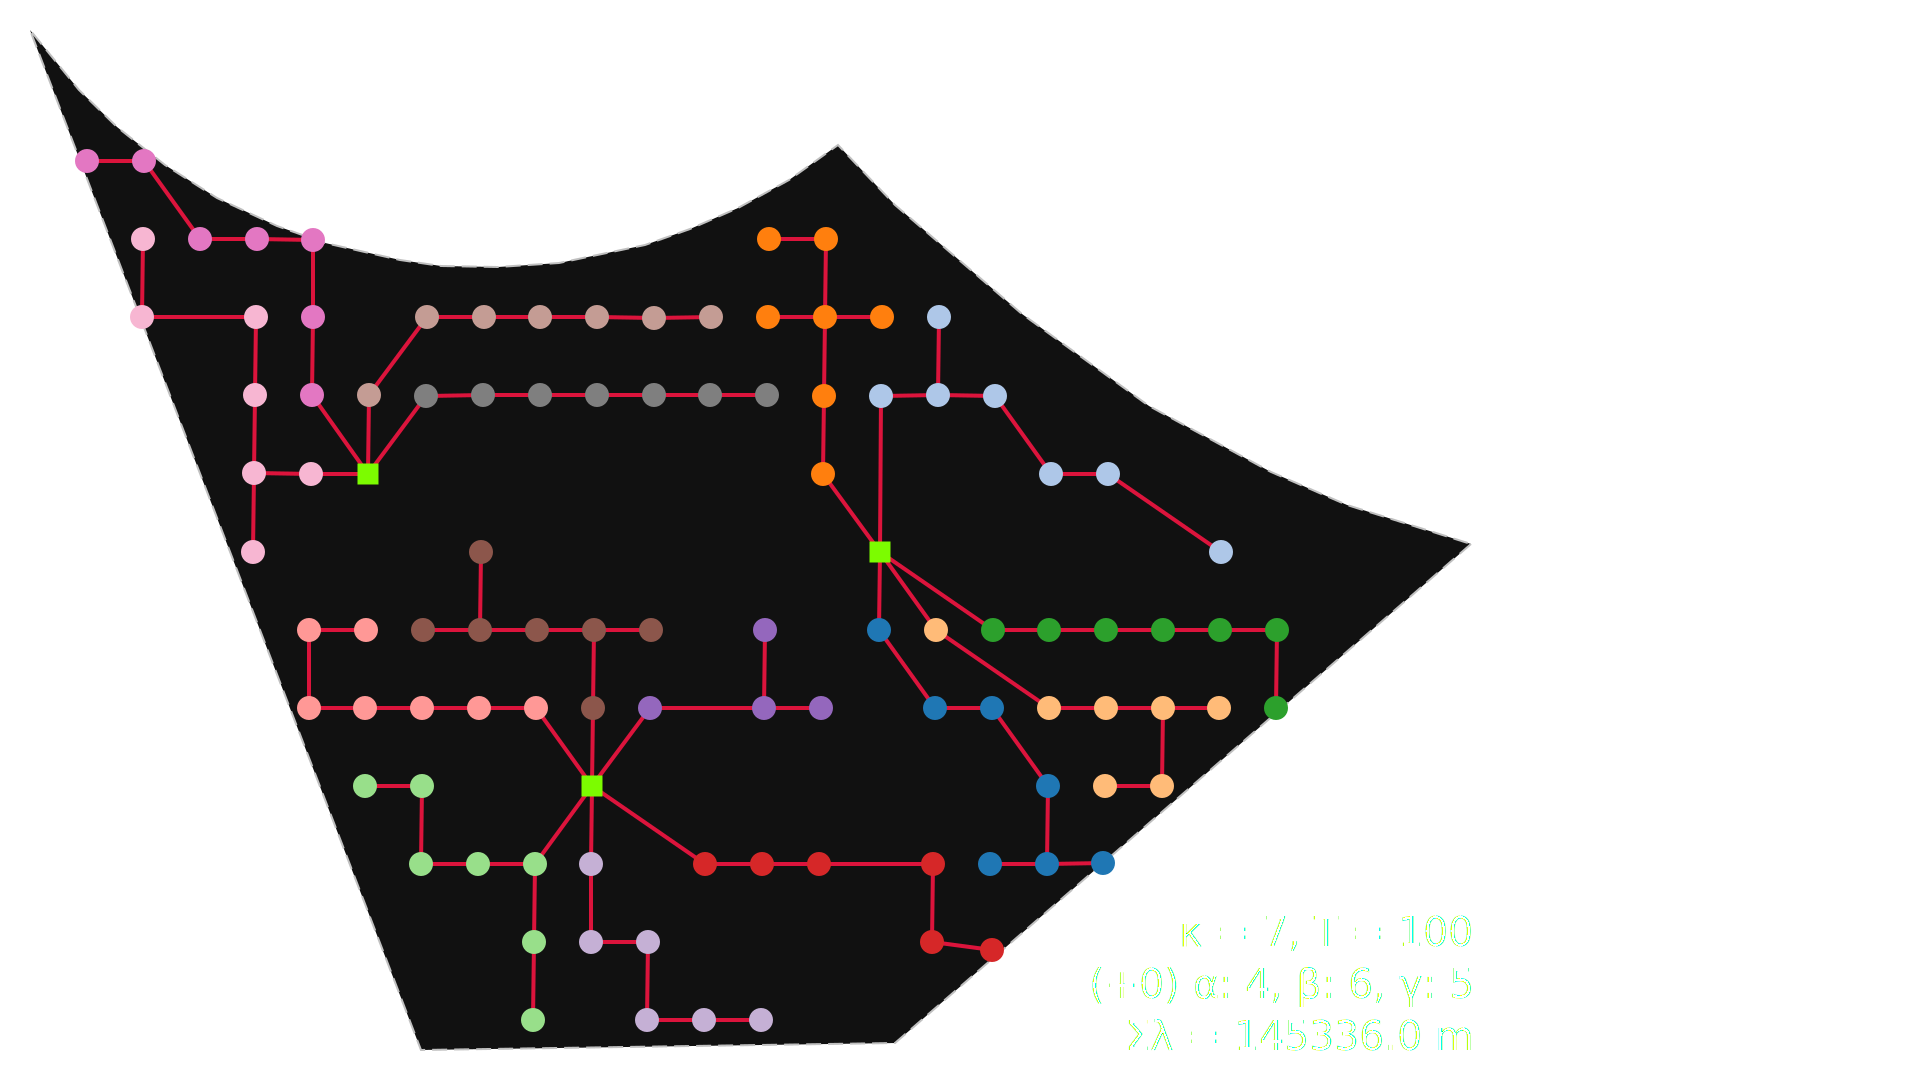

In [10]:
S = ort.S_from_solution(model, orter, result)
G = G_from_S(S, A)
H = PathFinder(G, planar=P, A=A).create_detours()
svgplot(H)